In [16]:
import networkx as nx
import matplotlib.pyplot as plt  # Optional for visualization


In [17]:
G = nx.DiGraph()


In [18]:
# Add Exploits as nodes (represented as tuples)
exploits = [
    (1, 'Exploit 1', 'Vulnerability A', 'Server 1'),
    (2, 'Exploit 2', 'Vulnerability B', 'Server 2'),
    (3, 'Exploit 3', 'Vulnerability C', 'Server 3'),
    (4, 'Exploit 4', 'Vulnerability D', 'Server 4'),
    (5, 'Exploit 5', 'Vulnerability E', 'Server 5'),
    (6, 'Exploit 6', 'Vulnerability F', 'Server 6'),
    (7, 'Exploit 7', 'Vulnerability G', 'Server 7')
]

for exploit in exploits:
    G.add_node(exploit, type='Exploit')

# Add Security Conditions as nodes (represented as triples)
security_conditions = [
    ('Condition 1', 'Query 1', 'Web Application Firewall'),
    ('Condition 2', 'Query 2', 'Intrusion Detection System'),
    ('Condition 3', 'Query 3', 'Firewall'),
    ('Condition 4', 'Query 4', 'Antivirus Software')
]

for condition in security_conditions:
    G.add_node(condition, type='Security Condition')

In [19]:
# Create edges to represent conditions for exploits
G.add_edge((1, 'Exploit 1', 'Vulnerability A', 'Server 1'), ('Condition 1', 'Query 1', 'Web Application Firewall'))
G.add_edge((2, 'Exploit 2', 'Vulnerability B', 'Server 2'), ('Condition 2', 'Query 2', 'Intrusion Detection System'))
G.add_edge((2, 'Exploit 2', 'Vulnerability B', 'Server 2'), ('Condition 3', 'Query 3', 'Firewall'))
G.add_edge((3, 'Exploit 3', 'Vulnerability C', 'Server 3'), ('Condition 1', 'Query 1', 'Web Application Firewall'))
G.add_edge((4, 'Exploit 4', 'Vulnerability D', 'Server 4'), ('Condition 4', 'Query 4', 'Antivirus Software'))
G.add_edge((5, 'Exploit 5', 'Vulnerability E', 'Server 5'), ('Condition 2', 'Query 2', 'Intrusion Detection System'))
G.add_edge((6, 'Exploit 6', 'Vulnerability F', 'Server 6'), ('Condition 4', 'Query 4', 'Antivirus Software'))
G.add_edge((7, 'Exploit 7', 'Vulnerability G', 'Server 7'), ('Condition 3', 'Query 3', 'Firewall'))


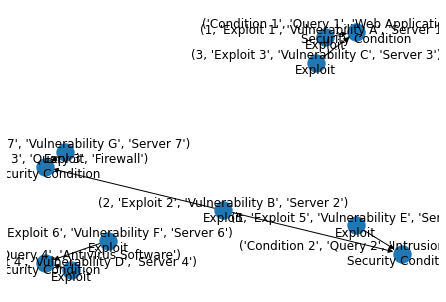

In [22]:
# Visualize the graph
pos = nx.spring_layout(G)
labels = {node: f"{node}\n{G.nodes[node]['type']}" for node in G.nodes()}
nx.draw(G, pos, with_labels=True, labels=labels)
plt.show()

In [24]:
# Find an attack path from Exploit 1 to Condition 4
initial_exploit = (5, 'Exploit 5', 'Vulnerability E', 'Server 5')
target_condition = ('Condition 2', 'Query 2', 'Intrusion Detection System')

path = nx.shortest_path(G, source=initial_exploit, target=target_condition)

print("Attack Path:")
for node in path:
    print(node)

Attack Path:
(5, 'Exploit 5', 'Vulnerability E', 'Server 5')
('Condition 2', 'Query 2', 'Intrusion Detection System')


In [25]:
import plotly.graph_objects as go

# Create a Plotly figure
fig = go.Figure()

# Add edges to the figure
for edge in G.edges():
    fig.add_trace(go.Scatter(x=[edge[0][0], edge[1][0]], y=[edge[0][1], edge[1][1]], mode='lines'))

# Add nodes to the figure
for node in G.nodes():
    fig.add_trace(go.Scatter(x=[node[0]], y=[node[1]], mode='markers', marker=dict(size=10)))

# Set the layout of the figure
fig.update_layout(title='Graph G', title_x=0.5, showlegend=False)

# Show the figure
fig.show()